Exploring Ebay Car Sales Data: Kleinanseigen Dataset

We'll work with a dataset of used cars from eBay Kleinanzeigen, a classifieds section of the German eBay website.

The dataset was originally scraped and uploaded to Kaggle. A few modifications were made from the original dataset that was uploaded to Kaggle.

The aim of this project is to clean the data, analyze the included used car listings, and become familiar with some of the unique benefits jupyter notebook provides for pandas.


In [1]:
import pandas as pd
import numpy as np

In [2]:
autos = pd.read_csv('autos.csv',encoding = 'Latin-1')
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [3]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

*Columns missing values (no columns > 20% missing)
*There are 5 integer columns and 15 string columns
*Car Names are varied
*Price and odometer could be converted to numbers
*There are 3 columns of detailed datetimes and 2 columns of dates
*olumn names are camelCase

In [4]:
cols = autos.columns

In [5]:
cols

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [6]:
#Columns names replaced to improve readability
autos.columns = (cols
                 .str.replace('yearOfRegistration','registration_year')
                 .str.replace('monthOfRegistration','registration_month')
                 .str.replace('notRepairedDamage','unrepaired_damage')
                 .str.replace('dateCreated','ad_created')
                 .str.replace('nrOfPictures','num_photos')
                )

In [7]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,registration_year,gearbox,powerPS,model,odometer,registration_month,fuelType,brand,unrepaired_damage,ad_created,num_photos,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [8]:
autos.describe(include='all')

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,registration_year,gearbox,powerPS,model,odometer,registration_month,fuelType,brand,unrepaired_damage,ad_created,num_photos,postalCode,lastSeen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-21 16:37:21,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


Columns seller and offerType are almost all of the same value***
odometer and price are numeric data stored as string***
num_photos has all 0 in descriptive stats***

In [9]:
autos.num_photos.value_counts(dropna=False) #num_photos also has all the same values, should drop
autos = autos.drop(['seller','offerType','num_photos'],axis=1)

In [10]:
autos['price'] = (autos.price
                        .str.replace('$','')
                        .str.replace(',','')
                        .astype(int) 
                 )
autos['odometer'] = (autos.odometer
                        .str.replace('km','')
                        .str.replace(',','')
                        .astype(int)
                       )

In [12]:
autos = autos.rename({'odometer':'odometer_km'},axis = 1)

In [14]:
autos.price.unique().shape

(2357,)

In [15]:
autos.odometer_km.unique().shape

(13,)

In [16]:
autos[['price','odometer_km']].describe()

,price,odometer_km
count,5.000000e+04,50000.000000
mean,9.840044e+03,125732.700000
std,4.811044e+05,40042.211706
min,0.000000e+00,5000.000000
25%,1.100000e+03,125000.000000
50%,2.950000e+03,150000.000000
75%,7.200000e+03,150000.000000
max,1.000000e+08,150000.000000


In [17]:
autos.price.value_counts().sort_index()

0           1421
1            156
2              3
3              1
5              2
8              1
9              1
10             7
11             2
12             3
13             2
14             1
15             2
17             3
18             1
20             4
25             5
29             1
30             7
35             1
40             6
45             4
47             1
49             4
50            49
55             2
59             1
60             9
65             5
66             1
            ... 
151990         1
155000         1
163500         1
163991         1
169000         1
169999         1
175000         1
180000         1
190000         1
194000         1
197000         1
198000         1
220000         1
250000         1
259000         1
265000         1
295000         1
299000         1
345000         1
350000         1
999990         1
999999         2
1234566        1
1300000        1
3890000        1
10000000       1
11111111       2
12345678      

After 350,000 , the prices suddenly jumps to 999990. This example and prices above look like outliers.

In [18]:
autos = autos[autos.price.between(1,350000)] 

In [19]:
autos.odometer_km.value_counts().sort_index()  
# neatly rounded options suggest preset options for sellers
# most cars are high mileage

5000        836
10000       253
20000       762
30000       780
40000       815
50000      1012
60000      1155
70000      1217
80000      1415
90000      1734
100000     2115
125000     5057
150000    31414
Name: odometer_km, dtype: int64

In [20]:
autos['dateCrawled'].str[:10].value_counts(normalize=True, dropna=False).sort_index()


2016-03-05    0.025327
2016-03-06    0.014043
2016-03-07    0.036014
2016-03-08    0.033296
2016-03-09    0.033090
2016-03-10    0.032184
2016-03-11    0.032575
2016-03-12    0.036920
2016-03-13    0.015670
2016-03-14    0.036549
2016-03-15    0.034284
2016-03-16    0.029610
2016-03-17    0.031628
2016-03-18    0.012911
2016-03-19    0.034778
2016-03-20    0.037887
2016-03-21    0.037373
2016-03-22    0.032987
2016-03-23    0.032225
2016-03-24    0.029342
2016-03-25    0.031607
2016-03-26    0.032204
2016-03-27    0.031092
2016-03-28    0.034860
2016-03-29    0.034099
2016-03-30    0.033687
2016-03-31    0.031834
2016-04-01    0.033687
2016-04-02    0.035478
2016-04-03    0.038608
2016-04-04    0.036487
2016-04-05    0.013096
2016-04-06    0.003171
2016-04-07    0.001400
Name: dateCrawled, dtype: float64

Number of listings crawled suddenly dropped by 4-10x on 2016-4-06 and 2016-4-07

In [22]:
autos['lastSeen'].str[:10].value_counts(normalize=True, dropna=False).sort_index()


2016-03-05    0.001071
2016-03-06    0.004324
2016-03-07    0.005395
2016-03-08    0.007413
2016-03-09    0.009595
2016-03-10    0.010666
2016-03-11    0.012375
2016-03-12    0.023783
2016-03-13    0.008895
2016-03-14    0.012602
2016-03-15    0.015876
2016-03-16    0.016452
2016-03-17    0.028086
2016-03-18    0.007351
2016-03-19    0.015834
2016-03-20    0.020653
2016-03-21    0.020632
2016-03-22    0.021373
2016-03-23    0.018532
2016-03-24    0.019767
2016-03-25    0.019211
2016-03-26    0.016802
2016-03-27    0.015649
2016-03-28    0.020859
2016-03-29    0.022341
2016-03-30    0.024771
2016-03-31    0.023783
2016-04-01    0.022794
2016-04-02    0.024915
2016-04-03    0.025203
2016-04-04    0.024483
2016-04-05    0.124761
2016-04-06    0.221806
2016-04-07    0.131947
Name: lastSeen, dtype: float64

48% of the last seen pages were on 2016-04-05 to 2016-04-07, may be related to crawling period ending

In [25]:
autos.brand.value_counts(normalize=True)

volkswagen        0.212828
opel              0.108658
bmw               0.108597
mercedes_benz     0.095789
audi              0.085823
ford              0.069639
renault           0.047874
peugeot           0.029445
fiat              0.025986
seat              0.018944
skoda             0.016061
nissan            0.015258
mazda             0.015217
smart             0.014290
citroen           0.014125
toyota            0.012581
hyundai           0.009945
sonstige_autos    0.009698
volvo             0.009039
mini              0.008607
mitsubishi        0.008216
honda             0.007989
kia               0.007104
alfa_romeo        0.006610
porsche           0.005910
suzuki            0.005889
chevrolet         0.005663
chrysler          0.003480
dacia             0.002656
daihatsu          0.002512
jeep              0.002224
subaru            0.002121
land_rover        0.002039
saab              0.001627
daewoo            0.001565
jaguar            0.001524
trabant           0.001400
r

There are 40 brands in the dataset. Volkswagen has more than double the number of bmw in rank 2. The top 6 brands by number of listing each have more than 5% of the total number of listings. Together they represent 65% of the listings and are selected to be analyzed.

In [26]:
top_20 = autos.brand.value_counts(normalize=True).index[:20]
brand_prices = {}
for brand in top_20:
    group = autos[autos.brand == brand]
    brand_prices[brand] = int(group.price.mean())

In [27]:
top_20
for brand in sorted(brand_prices, key=brand_prices.get):
    print(brand, brand_prices[brand])

renault 2431
fiat 2793
opel 2944
peugeot 3065
smart 3518
ford 3728
citroen 3761
mazda 4059
seat 4315
nissan 4669
volvo 4866
toyota 5148
volkswagen 5332
hyundai 5371
skoda 6353
bmw 8261
mercedes_benz 8536
audi 9212
mini 10541
sonstige_autos 12149


Opel and ford have significantly lower prices. This could be due to ford and opel being older vehicles and thus having a greater supply in the market.

In [28]:
auto_top_20 = autos[autos.brand.isin(top_20)]
auto_top_20[['brand','registration_year']].groupby('brand').mean()

,registration_year
brand,
audi,2004.554223
bmw,2003.406143
citroen,2003.572886
fiat,2003.942948
ford,2003.277942
hyundai,2007.498965
mazda,2003.541272
mercedes_benz,2005.134351
mini,2008.153110


Surprisingly, the registration_years are close to each other, so the age of vehicle is not a significant predictor of the huge differences in price.

In [29]:
brand_mileage = {}

for brand in top_20:
    group = autos[autos.brand == brand]
    brand_mileage[brand] = int(group.odometer_km.mean())

In [30]:
brand_summary = pd.DataFrame.from_dict(brand_mileage,orient='index').rename(columns = {0:'mean_mileage'})
price_series = pd.Series(brand_prices)
brand_summary['mean_prices'] = price_series
brand_summary.sort_values('mean_prices')

,mean_mileage,mean_prices
renault,128062,2431
fiat,117567,2793
opel,129383,2944
peugeot,127356,3065
smart,100511,3518
ford,124349,3728
citroen,119992,3761
mazda,124871,4059
seat,121641,4315
nissan,118711,4669


Between brands, car mileages do not vary as much as prices, mileage looks generally unrelated to price. The more expensive brands have a slightly higher mileage.

## Most common brand/model combinations

In [31]:
group = autos['model'].groupby(autos.brand).value_counts()

max_index = group.groupby(level='brand').apply(lambda x: x.idxmax()[1])
max_value = group.groupby(level='brand').apply(lambda x: x.max())
max_value.name = 'model_count'

pd.concat([max_index,max_value],axis=1)

,model,model_count
brand,,
alfa_romeo,156,89
audi,a4,1256
bmw,3er,2686
chevrolet,andere,149
chrysler,andere,52
citroen,andere,231
dacia,sandero,47
daewoo,matiz,24
daihatsu,cuore,66


## Relating Mileage and Price

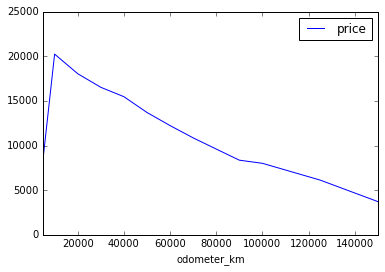

In [32]:
autos[['odometer_km','price']].corr() #only slight negative correlation generally
odometer_price = autos[['odometer_km','price']].groupby('odometer_km').mean()
odometer_price.price.reset_index().corr()
odometer_price.plot()

## Comparing damage vs no damage

In [33]:
autos.unrepaired_damage.value_counts(dropna =False)

nein    34775
NaN      9101
ja       4689
Name: unrepaired_damage, dtype: int64

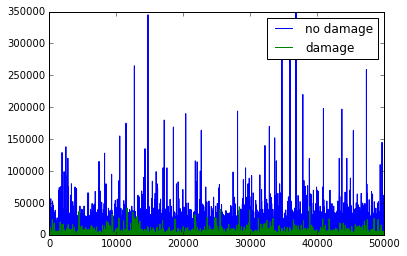

In [34]:
autos_nodamage = autos[autos.unrepaired_damage == 'nein']
autos_damage = autos[autos.unrepaired_damage == 'ja']

autos_nodamage.price.plot(label = 'no damage')
autos_damage.price.plot(label = 'damage')
plt.legend()